<a href="https://colab.research.google.com/github/alhsu713/IntroMLFinal/blob/master/ML_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
Our question:  Is it possible to whether or not a team won League of Legends match based on the statistics of a match?
Dataset used: https://www.kaggle.com/gyejr95/league-of-legendslol-ranked-games-2020-ver1/kernels?sortBy=dateRun&group=profile&pageSize=20&datasetId=586003
```



In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [ ]:
players = pd.read_csv('drive/My Drive/challenger_match.csv').copy()
players.head()

,Unnamed: 0,gameId,season,role,lane,accountId
0,0,4260630568,13,DUO_SUPPORT,BOTTOM,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
1,1,4260452798,13,DUO,TOP,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
2,2,4260353406,13,SOLO,MID,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
3,3,4260272376,13,SOLO,TOP,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
4,4,4260082928,13,SOLO,MID,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo


In [ ]:
players2 = pd.read_csv('drive/My Drive/challenger_match_V2.csv').copy()
players2.head()

,Unnamed: 0,gameId,season,role,lane,accountId
0,0,4118590836,13,SOLO,TOP,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
1,1,4118495113,13,DUO_SUPPORT,NONE,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
2,2,4118432488,13,DUO_SUPPORT,NONE,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
3,3,4118306793,13,SOLO,TOP,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
4,4,4105344112,13,DUO_SUPPORT,NONE,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo


In [ ]:
matches = pd.read_csv('drive/My Drive/match_data_version1.csv').copy()
matches.columns

In [ ]:
losers = pd.read_csv('drive/My Drive/match_loser_data_version1.csv').copy()
winners = pd.read_csv('drive/My Drive/match_winner_data_version1.csv').copy()
losers.columns
winners.columns

Index(['Unnamed: 0', 'teamId', 'win', 'firstBlood', 'firstTower',
       'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald',
       'towerKills', 'inhibitorKills', 'baronKills', 'dragonKills',
       'vilemawKills', 'riftHeraldKills', 'dominionVictoryScore', 'bans',
       'gameId'],
      dtype='object')

We will examine how various in-game 'achievements' such as first blood (the team to kill their enemy first), first tower, first baron, etc. vary between losers and winners of a match.  In the files "match_loser_data_version1.csv" and "match_winner_data_version1.csv", information on first blood, first tower, inhibitor, baron, dragon, and rift herald are stored as booleans.  Number of tower kills, inhibitor kills, bro kills, dragon kills, vilemaw kills, rift herald kills, and dominion victory scores are stored as integers.  In an attempt to numerate these achievements, all the boolean values are added to a column “sum”- 1 for true and 0 for false. Since each team has a total of 11 enemy towers to destroy, the number of towers killed are added to “sum” as a fraction of 11, and the rest of the integer columns are added as is.  These sums are graphed below in histograms.  


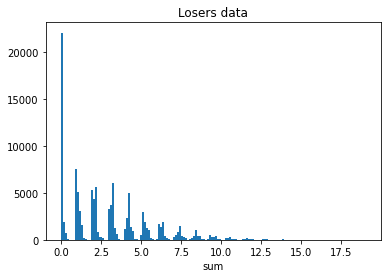

In [ ]:
losers1 = losers.copy()
losers1['sum'] = losers1['firstBlood'].astype(int) + losers1['firstTower'].astype(int) + losers1['firstBaron'].astype(int) + losers1['firstDragon'].astype(int) + losers1['firstRiftHerald'].astype(int) + losers1['towerKills']/11 + losers1['inhibitorKills'] + losers1['baronKills'] + losers1['dragonKills'] + losers1['vilemawKills'] + losers1['riftHeraldKills'] + losers1['dominionVictoryScore']
plt.hist(losers1['sum'], bins = 150)
plt.title('Losers data')
plt.xlabel('sum')
plt.ylable = ('Frequency')

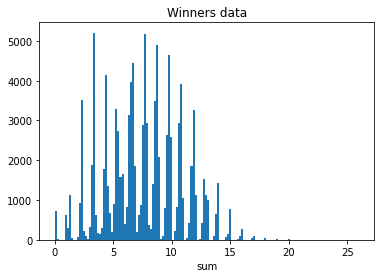

In [ ]:
winners1=winners.copy()
winners1['sum'] = winners1['firstBlood'].astype(int) + winners1['firstTower'].astype(int) + winners1['firstBaron'].astype(int) + losers1['firstDragon'].astype(int) + winners1['firstRiftHerald'].astype(int) + winners1['towerKills']/11 + winners1['inhibitorKills'] + winners1['baronKills'] + winners1['dragonKills'] + winners1['vilemawKills'] + winners1['riftHeraldKills'] + winners1['dominionVictoryScore']
plt.hist(winners1['sum'], bins = 150)
plt.title('Winners data')
plt.xlabel('sum')
plt.ylable = ('Frequency')

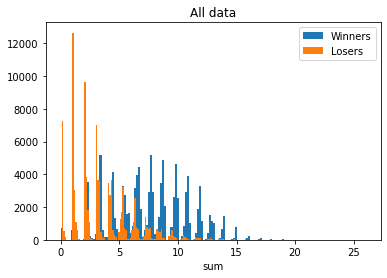

In [ ]:
losers2 = losers1[losers1['sum']>0] #drop the 0 values for loser graph is more coherent
plt.hist(winners1['sum'], bins = 150, label='Winners')
plt.hist(losers2['sum'], bins = 150, label = 'Losers')
plt.title('All data')
plt.xlabel('sum')
plt.ylable = ('Frequency')
plt.legend(loc='upper right')

In [ ]:
matches.drop(columns=['Unnamed: 0', 'gameCreation', 'gameMode',
       'gameType', 'gameVersion', 'mapId', 'platformId', 'queueId', 'seasonId', 'status.message',
       'status.status_code']).head()

,gameDuration,gameId,participantIdentities,participants
0,1323.0,4.247263e+09,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion..."
1,1317.0,4.247156e+09,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion..."
2,932.0,4.243963e+09,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion..."
3,2098.0,4.241678e+09,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion..."
4,2344.0,4.241539e+09,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion..."


In [ ]:
X_firsts_winners = winners.drop(['Unnamed: 0', 'teamId', 'win',
       'towerKills', 'inhibitorKills', 'baronKills', 'dragonKills',
       'vilemawKills', 'riftHeraldKills', 'dominionVictoryScore', 'bans',
       'gameId'], axis=1)
X_firsts_losers = losers.drop(['Unnamed: 0', 'teamId', 'win',
       'towerKills', 'inhibitorKills', 'baronKills', 'dragonKills',
       'vilemawKills', 'riftHeraldKills', 'dominionVictoryScore', 'bans',
       'gameId'], axis=1)

In [ ]:
# data for winners & losers for first blood, tower, inhib, baron, drag, rift
# first half is data from the winners, second half is losers
X_firsts = pd.concat([X_firsts_winners, X_firsts_losers]) 

# convert boolean values to 0 and 1
X_firsts['firstBlood'] = X_firsts['firstBlood'].astype(int)
X_firsts['firstTower'] = X_firsts['firstTower'].astype(int)
X_firsts['firstInhibitor'] = X_firsts['firstInhibitor'].astype(int)
X_firsts['firstBaron'] = X_firsts['firstBaron'].astype(int)
X_firsts['firstDragon'] = X_firsts['firstDragon'].astype(int)
X_firsts['firstRiftHerald'] = X_firsts['firstRiftHerald'].astype(int)

In [ ]:
Y_firsts_winners = winners.drop(['Unnamed: 0', 'teamId', 'firstBlood', 'firstTower',
       'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald',
       'towerKills', 'inhibitorKills', 'baronKills', 'dragonKills',
       'vilemawKills', 'riftHeraldKills', 'dominionVictoryScore', 'bans',
       'gameId'], axis=1)
Y_firsts_losers = losers.drop(['Unnamed: 0', 'teamId', 'firstBlood', 'firstTower',
       'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald',
       'towerKills', 'inhibitorKills', 'baronKills', 'dragonKills',
       'vilemawKills', 'riftHeraldKills', 'dominionVictoryScore', 'bans',
       'gameId'], axis=1)
Y_firsts = pd.concat([Y_firsts_winners, Y_firsts_losers])

In [ ]:
# for x in range(0, len(Y_firsts)):
#     if Y_firsts.iloc[x,0] == 'Win':
#         Y_firsts.iloc[x,0] = 1
#     else:
#         Y_firsts.iloc[x,0] = 0
# Y_firsts=Y_firsts['win'].astype(int)

Y_firsts['win'] = (Y_firsts['win']=='Win').astype(int)


In [ ]:
# list of test accuracies for KNN and decision trees that we will compare
accuracies = []

In [ ]:
X_f_train, X_f_test, Y_f_train, Y_f_test = train_test_split(X_firsts, Y_firsts, test_size=0.2)

In [ ]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
knn.fit(X_f_train, Y_f_train)
knn_pred_train = knn.predict(X_f_train)
knn_pred_test = knn.predict(X_f_test)
print("Train Accuracy: ", accuracy_score(Y_f_train, knn_pred_train))
print("Test Accuracy: ", accuracy_score(Y_f_test, knn_pred_test))
accuracies.append(accuracy_score(Y_f_test, knn_pred_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Train Accuracy:  0.8268380368239091
Test Accuracy:  0.8297574198290912


In [ ]:
# number of objectives taken
X_obj_winners = winners.drop(['Unnamed: 0', 'teamId', 'win', 'firstBlood', 'firstTower',
       'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald',
       'vilemawKills', 'dominionVictoryScore', 'bans', 'gameId'], axis=1)
X_obj_losers = losers.drop(['Unnamed: 0', 'teamId', 'win', 'firstBlood', 'firstTower',
       'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald',
       'vilemawKills', 'dominionVictoryScore', 'bans', 'gameId'], axis=1)
# data for winners & losers for # of towers, inhibs, barons, dragons, and rifts taken
# first half is data from the winners, second half is losers
X_obj = pd.concat([X_obj_winners, X_obj_losers]) 

In [ ]:
X_obj_train, X_obj_test, Y_obj_train, Y_obj_test = train_test_split(X_obj, Y_firsts, test_size=0.2)

In [ ]:
knn2 = KNeighborsClassifier()
knn2.fit(X_obj_train, Y_obj_train)
knn_pred_train2 = knn2.predict(X_obj_train)
knn_pred_test2 = knn2.predict(X_obj_test)
print("Train Accuracy: ", accuracy_score(Y_obj_train, knn_pred_train2))
print("Test Accuracy: ", accuracy_score(Y_obj_test, knn_pred_test2))
accuracies.append(accuracy_score(Y_obj_test, knn_pred_test2))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Train Accuracy:  0.8550245224722327
Test Accuracy:  0.8549113295966185


In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# all 'first' achievements, e.g. firstBaron, firstDragon
model_firsts=tree.DecisionTreeClassifier()
model_firsts.fit(X_f_train, Y_f_train)
dtree_f_pred_train = model_firsts.predict(X_f_train)
dtree_f_pred_test = model_firsts.predict(X_f_test) 
print("Train Accuracy: ", accuracy_score(Y_f_train, dtree_f_pred_train))
print("Test Accuracy: ", accuracy_score(Y_f_test, dtree_f_pred_test))
accuracies.append(accuracy_score(Y_f_test, dtree_f_pred_test))

Train Accuracy:  0.8406958179708947
Test Accuracy:  0.8454699990811357


In [ ]:
# decision tree for all objectives w/ numerical values
model_obj=tree.DecisionTreeClassifier()
model_obj.fit(X_obj_train, Y_obj_train)
dtree_obj_pred_train = model_obj.predict(X_obj_train)
dtree_obj_pred_test = model_obj.predict(X_obj_test) 
print("Train Accuracy: ", accuracy_score(Y_obj_train, dtree_obj_pred_train))
print("Test Accuracy: ", accuracy_score(Y_obj_test, dtree_obj_pred_test))
accuracies.append(accuracy_score(Y_obj_test, dtree_obj_pred_test))

Train Accuracy:  0.863920379495308
Test Accuracy:  0.8640999724340714


To see if we could further improve our models, we tried to split up the features to see if only a few (i.e. just the number of destroyed towers and/or inhibitors) could be used create a better model rather than sticking to the features in the given format, like ALL of the first achievements.

In [ ]:
# all of the first monsters (dragon, baron, rift herald)
X_firsts_m = X_firsts.drop(['firstBlood', 'firstTower', 'firstInhibitor'], axis=1)

In [ ]:
# KNN for all of the first monsters
X_fm_train, X_fm_test, Y_fm_train, Y_fm_test = train_test_split(X_firsts_m, Y_firsts, test_size=0.2)
knn_m = KNeighborsClassifier()
knn_m.fit(X_fm_train, Y_fm_train)
knn_m_pred_train = knn_m.predict(X_fm_train)
knn_m_pred_test = knn_m.predict(X_fm_test)
print("Train Accuracy: ", accuracy_score(Y_fm_train, knn_m_pred_train))
print("Test Accuracy: ", accuracy_score(Y_fm_test, knn_m_pred_test))
accuracies.append(accuracy_score(Y_fm_test, knn_m_pred_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Train Accuracy:  0.7155967517774485
Test Accuracy:  0.7182991822107875


In [ ]:
# decision tree for all the first monsters
model_fm=tree.DecisionTreeClassifier()
model_fm.fit(X_fm_train, Y_fm_train)
dtree_fm_pred_train = model_fm.predict(X_fm_train)
dtree_fm_pred_test = model_fm.predict(X_fm_test) 
print("Train Accuracy: ", accuracy_score(Y_fm_train, dtree_fm_pred_train))
print("Test Accuracy: ", accuracy_score(Y_fm_test, dtree_fm_pred_test))
accuracies.append(accuracy_score(Y_fm_test, dtree_fm_pred_test))

Train Accuracy:  0.7155967517774485
Test Accuracy:  0.7182991822107875


In [ ]:
# first inhibitor
X_fi = X_firsts.drop(['firstBlood', 'firstBaron', 'firstDragon', 'firstRiftHerald', 'firstTower'], axis=1)

In [ ]:
# KNN for first inhibitor
X_fi_train, X_fi_test, Y_fi_train, Y_fi_test = train_test_split(X_fi, Y_firsts, test_size=0.2)
knn_fi = KNeighborsClassifier()
knn_fi.fit(X_fi_train, Y_fi_train)
knn_fi_pred_train = knn_fi.predict(X_fi_train)
knn_fi_pred_test = knn_fi.predict(X_fi_test)
print("Train Accuracy: ", accuracy_score(Y_fi_train, knn_fi_pred_train))
print("Test Accuracy: ", accuracy_score(Y_fi_test, knn_fi_pred_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Train Accuracy:  0.8140599336112929
Test Accuracy:  0.8148718184324175


In [ ]:
# decision tree for first inhibitor
model_fi=tree.DecisionTreeClassifier()
model_fi.fit(X_fi_train, Y_fi_train)
dtree_fi_pred_train = model_fi.predict(X_fi_train)
dtree_fi_pred_test = model_fi.predict(X_fi_test) 
print("Train Accuracy: ", accuracy_score(Y_fi_train, dtree_fi_pred_train))
print("Test Accuracy: ", accuracy_score(Y_fi_test, dtree_fi_pred_test))

Train Accuracy:  0.8140599336112929
Test Accuracy:  0.8148718184324175


When testing singular features, as above with only the first inhibitor data, we found that the KNN and decision tree models seemed to give the same test and train accuracy scores for the same test train split set, so we decided to use multiple features for these models.

In [ ]:
# inhibs and towers
X_ti = X_obj.drop(['dragonKills', 'baronKills', 'riftHeraldKills'], axis=1)

In [ ]:
# KNN for number of inhibitors and towers
X_ti_train, X_ti_test, Y_ti_train, Y_ti_test= train_test_split(X_ti, Y_firsts, test_size=0.2)
knn_ti = KNeighborsClassifier()
knn_ti.fit(X_ti_train, Y_ti_train)
knn_ti_pred_train = knn_ti.predict(X_ti_train)
knn_ti_pred_test = knn_ti.predict(X_ti_test)
print("Train Accuracy: ", accuracy_score(Y_ti_train, knn_ti_pred_train))
print("Test Accuracy: ", accuracy_score(Y_ti_test, knn_ti_pred_test))
accuracies.append(accuracy_score(Y_ti_test, knn_ti_pred_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Train Accuracy:  0.7732791197179054
Test Accuracy:  0.7721676008453552


In [ ]:
# decision tree for number of inhibitors and towers
model_ti=tree.DecisionTreeClassifier()
model_ti.fit(X_ti_train, Y_ti_train)
dtree_ti_pred_train = model_ti.predict(X_ti_train)
dtree_ti_pred_test = model_ti.predict(X_ti_test) 
print("Train Accuracy: ", accuracy_score(Y_ti_train, dtree_ti_pred_train))
print("Test Accuracy: ", accuracy_score(Y_ti_test, dtree_ti_pred_test))
accuracies.append(accuracy_score(Y_ti_test, dtree_ti_pred_test))

Train Accuracy:  0.8534566922803027
Test Accuracy:  0.8562207112009557


In [ ]:
# number of dragons and barons
X_db = X_obj.drop(['inhibitorKills', 'towerKills','riftHeraldKills'], axis=1)

In [ ]:
# KNN for dragons and barons
X_db_train, X_db_test, Y_db_train, Y_db_test= train_test_split(X_db, Y_firsts, test_size=0.2)
knn_db = KNeighborsClassifier()
knn_db.fit(X_db_train, Y_db_train)
knn_db_pred_train = knn_db.predict(X_db_train)
knn_db_pred_test = knn_db.predict(X_db_test)
print("Train Accuracy: ", accuracy_score(Y_db_train, knn_db_pred_train))
print("Test Accuracy: ", accuracy_score(Y_db_test, knn_db_pred_test))
accuracies.append(accuracy_score(Y_db_test, knn_db_pred_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Train Accuracy:  0.6920907848339708
Test Accuracy:  0.6991408618946982


In [ ]:
# decision tree for dragons and barons
model_db=tree.DecisionTreeClassifier()
model_db.fit(X_db_train, Y_db_train)
dtree_db_pred_train = model_db.predict(X_db_train)
dtree_db_pred_test = model_db.predict(X_db_test) 
print("Train Accuracy: ", accuracy_score(Y_db_train, dtree_db_pred_train))
print("Test Accuracy: ", accuracy_score(Y_db_test, dtree_db_pred_test))
accuracies.append(accuracy_score(Y_db_test, dtree_db_pred_test))

Train Accuracy:  0.7210812859653355
Test Accuracy:  0.7251447211246899


In [ ]:
df = pd.DataFrame({'accuracies': accuracies}, columns = ['all objectives- knn', 'all objectives- dt', 'all first monsters- knn', 'all first monsters- dt', 'inhibs and towers- knn', 'inhibs and towers- dt', 'dragons and barons- knn', 'dragons and barons-dt'])
ax = df.plot.bar(rot=-45)

TypeError: ignored

We compared the test accuracy scores for the KNN and decision tree models for all first achievements, all objectives, number of inhibitors and towers, and number of dragons and barons.

Some other considerations that would improve the models would be incorporating the time of the matches, given in seconds in the match_data_version1.csv file. There are some game mechanics that limit the effectiveness of these models without including the time -- monsters spawn and despawn at certain times, and it is also possible for teams to forfeit matches, either unanimously after 15 minutes have passed or with 80% of the team voting to surrender after 20 minutes. If a game is not sufficiently long, certain objectives will not spawn, so the data would be biased without including such factors.